In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
import time
import os


# Load MNIST 
def load_dataset():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  x_train = x_train.reshape(-1, 28, 28, 1)
  x_test = x_test.reshape(-1, 28, 28, 1)
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test) 
  return (x_train, y_train,x_test,y_test)

x_train, y_train,x_test,y_test = load_dataset()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
input_shape = (28, 28, 1)



In [29]:
# Data augmentation with ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(x_train)
start = time.time()

# Define CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# Train model with data augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), 
                              steps_per_epoch=len(x_train) // 32, epochs=10, validation_data=(x_test, y_test))
end = time.time()
total = end-start
test_loss, test_acc = model.evaluate(x_test, y_test)


Epoch 1/10


C:\Users\kikik\AppData\Local\Temp\ipykernel_19472\1268032872.py:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),


1875/1875 [==============================] - 40s 21ms/step - loss: 0.2066 - accuracy: 0.9369 - val_loss: 0.0553 - val_accuracy: 0.9823
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0869 - accuracy: 0.9739 - val_loss: 0.0400 - val_accuracy: 0.9879
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0733 - accuracy: 0.9778 - val_loss: 0.0358 - val_accuracy: 0.9882
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0574 - accuracy: 0.9830 - val_loss: 0.0359 - val_accuracy: 0.9893
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0499 - accuracy: 0.9851 - val_loss: 0.0512 - val_accuracy: 0.9824
Epoch 6/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0490 - accuracy: 0.9853 - val_loss: 0.0277 - val_accuracy: 0.9914
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0427 - accuracy: 0.9873 - val_loss: 0.0301 - val_accura

In [30]:
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
print(f"Finsih Traine {total/60} minute")
os.environ['CUDA_VISIBLE_DEVICES'] = ''   
if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

Test loss: 0.02727542445063591
Test accuracy: 0.9918000102043152
Finsih Traine 6.717317668596904 minute
No GPU found


313/313 [==============================] - 2s 5ms/step
7


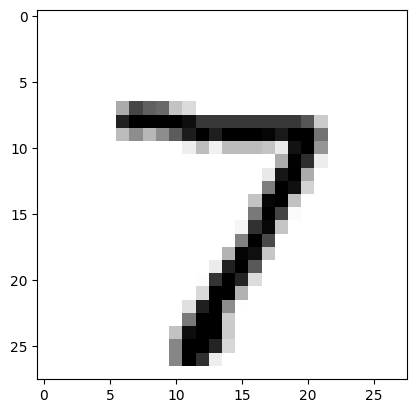

In [31]:
predictions = model.predict(x_test)
print(np.argmax(np.round(predictions[0])))
plt.imshow(x_test[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()